In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#import our CSV file
df = pd.read_csv('2019.csv')

#drop unneccessary columns
df.drop(['Rk', '2PM', '2PP', 'FantPt', 'DKPt', 'FDPt', 
         'VBD', 'PosRank', 'OvRank', 'PPR', 'Fmb', 
         'GS', 'Age', 'Tgt', 'Y/A', 'Att', 'Att.1', 'Cmp', 'Y/R'], axis=1, inplace=True)

#fix name formatting
df['Player'] = df['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])

#rename columns
df.rename({
    'TD': 'PassingTD',
    'TD.1': 'RushingTD',
    'TD.2': 'ReceivingTD',
    'TD.3': 'TotalTD',
    'Yds': 'PassingYDs',
    'Yds.1': 'RushingYDs',
    'Yds.2': 'ReceivingYDs',
}, axis=1, inplace=True)

"""Extra stuff before we parition DataFrames by position"""

#Make sure to put paranthesis if you break lines.
df['FantasyPoints'] = (df['PassingYDs']*0.04 + df['PassingTD']*4 - df['Int']*2 + df['RushingYDs']*.1 
                       + df['RushingTD']*6 + df['Rec']*1 + df['ReceivingYDs']*.1 + df['ReceivingTD']*6 - df['FL']*2)

df['FantasyPoints/GM'] = df['FantasyPoints']/df['G']

df = df[['Tm', 'FantPos', 'FantasyPoints', 'FantasyPoints/GM']]

#Unfortnately, our DataFrame in limited. 
df = df[df['Tm'] != '2TM']
df = df[df['Tm'] != '3TM']

""" End Extra stuff """

#seperate dataframes based off position
rb_df = df[df['FantPos'] == 'RB']
qb_df = df[df['FantPos'] == 'QB']
wr_df = df[df['FantPos'] == 'WR']
te_df = df[df['FantPos'] == 'TE']

wr_df.head()

,Tm,FantPos,FantasyPoints,FantasyPoints/GM
6,NOR,WR,374.6,23.412500
14,TAM,WR,274.1,19.578571
19,DET,WR,248.0,15.500000
25,LAR,WR,270.5,16.906250
26,ATL,WR,274.1,18.273333


In [3]:
examp_column_names = ['QB1', 'RB1', 'RB2', 'WR1', 'WR2', 'WR3', 'TE']

random_numbers = np.random.randn(10, 7)

example_df = pd.DataFrame(random_numbers, columns=examp_column_names)

example_df

,QB1,RB1,RB2,WR1,WR2,WR3,TE
0,1.342537,0.194981,1.320657,0.870540,-0.596929,-0.019271,-0.085606
1,0.140420,-0.135430,1.250910,-0.419606,0.814503,0.798145,-0.325143
2,-0.191676,0.556952,-1.735912,-1.750660,0.096297,-1.092683,-0.823555
3,-0.363542,0.487612,0.534172,0.190237,-1.624783,0.019941,-1.783202
4,-1.212009,-0.218084,-0.663592,1.012306,-0.812367,1.116250,0.566006
5,0.375432,-0.564398,-0.550218,0.973436,-1.380451,0.301574,-0.857676
6,-0.436606,-1.004079,-0.528769,2.923570,0.521279,0.376183,-0.790392
7,0.990181,1.229430,0.416227,0.799328,-0.042586,-0.958100,-0.551149
8,0.257062,-0.629067,-0.332270,-0.369001,0.232052,0.279518,-0.539097
9,-0.869670,-1.158465,0.595243,0.153475,-1.131835,-0.993413,0.765382


In [4]:
def get_top_players(df, n):
    return df.groupby('Tm').apply(lambda x: x.nlargest(n, ['FantasyPoints']).min()).reset_index(drop=True)

qb_df = get_top_players(qb_df, 1)
te_df = get_top_players(te_df, 1)
rb1_df = get_top_players(rb_df, 1)
rb2_df = get_top_players(rb_df, 2)
wr1_df = get_top_players(wr_df, 1)
wr2_df = get_top_players(wr_df, 2)
wr3_df = get_top_players(wr_df, 3)

new_names = {
    'QB1': qb_df,
    'TE1': te_df,
    'RB1': rb1_df,
    'RB2': rb2_df,
    'WR1': wr1_df,
    'WR2': wr2_df,
    'WR3': wr3_df
}

for name, new_df in new_names.items():
    new_df.rename({'FantasyPoints/GM': name}, axis=1, inplace=True)
    new_df.drop(['FantPos', 'FantasyPoints'], axis=1, inplace=True)
    new_df.set_index('Tm', inplace=True)
    
df = pd.concat([qb_df, te_df, rb1_df, rb2_df, wr1_df, wr2_df, wr3_df], axis=1)

df.head()

,QB1,TE1,RB1,RB2,WR1,WR2,WR3
Tm,,,,,,,
ARI,17.455000,3.180000,10.884615,6.369231,11.087500,11.087500,6.536364
ATL,17.689333,14.592308,14.114286,5.600000,18.273333,15.000000,6.175000
BAL,27.712000,13.813333,15.900000,5.787500,10.457143,5.943750,3.756250
BUF,17.660000,5.313333,12.325000,5.931250,14.654667,12.053333,4.220000
CAR,13.652308,8.835714,29.325000,1.831250,15.366667,10.731250,3.556250


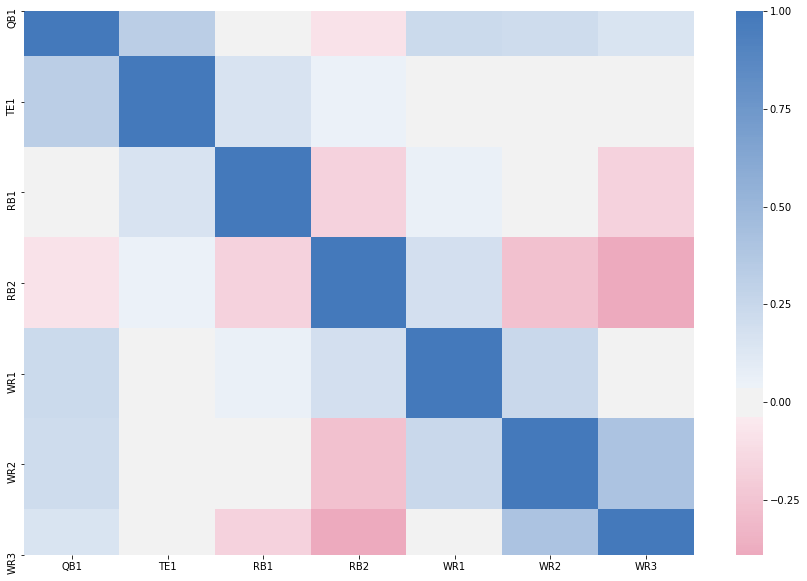

In [5]:
corrMatrix = df.corr()

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

cmap = sns.diverging_palette(0, 250, as_cmap=True)

vizCorrMatrix = sns.heatmap(corrMatrix,cmap=cmap, center=0)

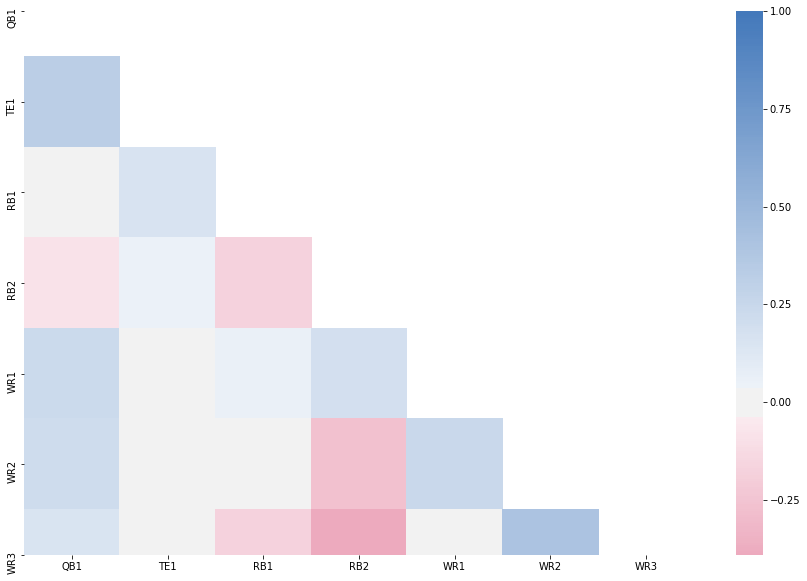

In [6]:
#This is for the Part 3 of Python for Fantasy Football Analysis

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

mask = np.zeros_like(corrMatrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

vizCorrMatrix = sns.heatmap(corrMatrix, mask=mask,cmap=cmap, center=0)